<a href="https://colab.research.google.com/github/Rohit-Annamaneni-1207/DN_project_route_trace/blob/main/DN_models_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim

**PREPROCESSING FOR NAIVE BAYES, DECISION TREE AND RANDOM FOREST**

In [ ]:
def latitude_longitude(place):
  geolocator = Nominatim()
  location = geolocator.geocode(place)
  lat=location.latitude
  lon=location.longitude
  return [lat, lon]

def predict_inverse(model, encoders, src_city, dest, hop_no):
  le_src_city = encoders[0]
  le_dest = encoders[1]
  le_hop_city = encoders[2]

  X = np.array([src_city, dest, hop_no])
  X[0] = le_src_city.transform([X[0]])[0]
  X[1] = le_dest.transform([X[1]])[0]
  # print(X)

  y = model.predict([X])
  # print(y)
  y = le_hop_city.inverse_transform([y[0]])[0]
  return [y] + latitude_longitude(y)





In [ ]:
url = "https://raw.githubusercontent.com/Rohit-Annamaneni-1207/DN_project_route_trace/main/route_data.csv"
url = "https://raw.githubusercontent.com/Rohit-Annamaneni-1207/DN_project_route_trace/main/route_data_updated.csv"
df = pd.read_csv(url, encoding = "utf-8")

In [ ]:
df

,Unnamed: 0,session_no,src,src_city,src_region,src_country,dest,Hop_No,avg_rtt,IP_Address,City,Region_Name,Country
0,0,0,10.0.16.155,Nandigāma,Andhra Pradesh,IN,google,1,4,203.129.246.53,Nandigāma,Andhra Pradesh,IN
1,1,0,10.0.16.155,Nandigāma,Andhra Pradesh,IN,google,2,4,203.129.218.109,Hubli,Karnataka,IN
2,2,0,10.0.16.155,Nandigāma,Andhra Pradesh,IN,google,3,6,61.1.117.54,Bengaluru,Karnataka,IN
3,3,0,10.0.16.155,Nandigāma,Andhra Pradesh,IN,google,4,24,117.216.207.115,Tanjore,Tamil Nadu,IN
4,4,0,10.0.16.155,Nandigāma,Andhra Pradesh,IN,google,5,26,142.250.160.26,Chennai,Tamil Nadu,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1,74,10.0.3.194,Delhi,Delhi,IN,amazon,2,18,116.119.72.96,Gurgaon,Haryana,IN
1653,2,74,10.0.3.194,Delhi,Delhi,IN,amazon,3,33,182.79.142.123,Hyderābād,Telangana,IN
1654,3,74,10.0.3.194,Delhi,Delhi,IN,amazon,4,48,23.56.136.206,Mumbai,Maharashtra,IN
1655,4,74,10.0.3.194,Delhi,Delhi,IN,amazon,5,100,104.70.118.197,Mumbai,Maharashtra,IN


In [ ]:
df[["Hop_No","dest"]]


,Hop_No,dest
0,1,google
1,2,google
2,3,google
3,4,google
4,5,google
...,...,...
1652,2,amazon
1653,3,amazon
1654,4,amazon
1655,5,amazon


In [ ]:
df["Hop_No"]

0       1
1       2
2       3
3       4
4       5
       ..
1652    2
1653    3
1654    4
1655    5
1656    6
Name: Hop_No, Length: 1657, dtype: int64

In [ ]:
df["dest"].values

array(['google', 'google', 'google', ..., 'amazon', 'amazon', 'amazon'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_dest = LabelEncoder()
X = df[["src_city", "dest", "Hop_No"]]
X = X.values
X[:,1] = le_dest.fit_transform(X[:,1])
X

array([['Nandigāma', 1, 1],
       ['Nandigāma', 1, 2],
       ['Nandigāma', 1, 3],
       ...,
       ['Delhi', 0, 4],
       ['Delhi', 0, 5],
       ['Delhi', 0, 6]], dtype=object)

In [ ]:
le_src_city = LabelEncoder()
le_hop_city = LabelEncoder()
y = df["City"].values
y

array(['Nandigāma', 'Hubli', 'Bengaluru', ..., 'Mumbai', 'Mumbai',
       'Mumbai'], dtype=object)

In [ ]:
y = le_hop_city.fit_transform(y)
X[:, 0] = le_src_city.fit_transform(X[:, 0])
y

array([12,  8,  4, ..., 11, 11, 11])

In [ ]:
X

array([[1, 1, 1],
       [1, 1, 2],
       [1, 1, 3],
       ...,
       [0, 0, 4],
       [0, 0, 5],
       [0, 0, 6]], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train)

1325

In [ ]:
len(X_test)

332

**NAIVE BAYES MODEL**

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
classifier.score(X_test, y_test)

0.5

In [ ]:
import joblib
joblib.dump(classifier, "NB_model")



['NB_model']

In [ ]:
np.save("src_city_classes.npy", le_src_city.classes_)
np.save("hop_city_classes.npy", le_hop_city.classes_)
np.save("dest_classes.npy", le_dest.classes_)



In [ ]:
test_encoder = LabelEncoder()
test_encoder.classes_ = np.load("dest_classes.npy", allow_pickle=True)

In [ ]:
t = test_encoder.inverse_transform([1])
t

array(['google'], dtype=object)

In [ ]:
test_encoder.classes_ = np.load("hop_city_classes.npy", allow_pickle=True)
t = test_encoder.inverse_transform([7,5,3,13])

In [ ]:
t

array(['Gurgaon', 'Chennai', 'Ashburn', 'Nelamangala'], dtype=object)

In [ ]:
t = test_encoder.inverse_transform(y_test[:10])
t

array(['Singapore', 'Chennai', 'Mountain View', 'Mountain View', 'Mumbai',
       'Singapore', 'Chennai', 'Mumbai', 'Singapore', 'Singapore'],
      dtype=object)

**DECISION TREE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc.score(X_test, y_test)

0.9006024096385542

In [ ]:
import joblib
joblib.dump(dtc, "DTC_model")

['DTC_model']

**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
rfc.score(X_test, y_test)

0.9006024096385542

In [ ]:
predict_inverse(rfc, [le_src_city, le_dest, le_hop_city], 'Nandigāma', 'amazon', 5)

/usr/local/lib/python3.8/dist-packages/geopy/geocoders/osm.py:132: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  warnings.warn(


['Ashburn', 39.030019100000004, -77.46964646557657]

In [ ]:
import joblib
joblib.dump(rfc, "RFC_model")

['RFC_model']

**Neural network**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(max_iter = 2000)
NN_model.fit(X_train, y_train)
NN_model.score(X_test, y_test)

0.8734939759036144

In [ ]:
predict_inverse(NN_model, [le_src_city, le_dest, le_hop_city], 'Nandigāma', 'amazon', 5)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/geopy/geocoders/osm.py:132: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  warnings.warn(


['Singapore', 1.357107, 103.8194992]

In [ ]:
import joblib
joblib.dump(NN_model, "NN_model")

['NN_model']

In [ ]:
X_test[0]

array([0, 2, 5], dtype=object)

In [ ]:
y_test[0]

18

In [ ]:
predict_inverse(NN_model, [le_src_city, le_dest, le_hop_city], 'Nandigāma', 'amazon', 6)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/geopy/geocoders/osm.py:132: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  warnings.warn(


['Singapore', 1.357107, 103.8194992]

**Statistical Representations**

In [ ]:
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'truth')

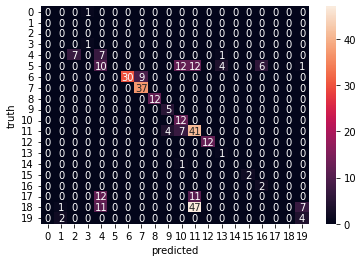

In [ ]:
from sklearn.metrics import confusion_matrix #Naive Bayes

y_predicted = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

Text(33.0, 0.5, 'truth')

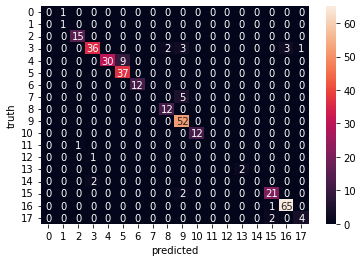

In [ ]:
from sklearn.metrics import confusion_matrix #Decision Tree

y_predicted = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

Text(33.0, 0.5, 'truth')

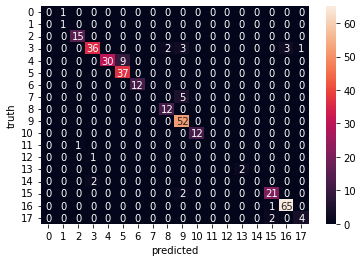

In [ ]:
from sklearn.metrics import confusion_matrix #Random forest

y_predicted = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

Text(33.0, 0.5, 'truth')

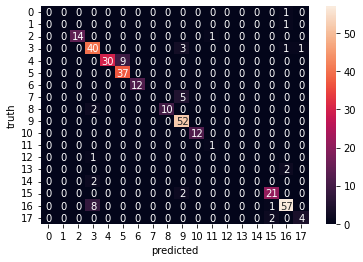

In [ ]:
from sklearn.metrics import confusion_matrix #Neural Network

y_predicted = NN_model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_c = df[["src_city", "dest", "Hop_No", "City","avg_rtt"]]
ohe_src = OneHotEncoder()
ohe_city = OneHotEncoder()
ohe_dest = OneHotEncoder()
df_c

,src_city,dest,Hop_No,City,avg_rtt
0,Nandigāma,google,1,Nandigāma,4
1,Nandigāma,google,2,Hubli,4
2,Nandigāma,google,3,Bengaluru,6
3,Nandigāma,google,4,Tanjore,24
4,Nandigāma,google,5,Chennai,26
...,...,...,...,...,...
1652,Delhi,amazon,2,Gurgaon,18
1653,Delhi,amazon,3,Hyderābād,33
1654,Delhi,amazon,4,Mumbai,48
1655,Delhi,amazon,5,Mumbai,100


In [ ]:
X = df_c.values[:, 0:4]
X

array([['Nandigāma', 'google', 1, 'Nandigāma'],
       ['Nandigāma', 'google', 2, 'Hubli'],
       ['Nandigāma', 'google', 3, 'Bengaluru'],
       ...,
       ['Delhi', 'amazon', 4, 'Mumbai'],
       ['Delhi', 'amazon', 5, 'Mumbai'],
       ['Delhi', 'amazon', 6, 'Mumbai']], dtype=object)

In [ ]:
Y = df_c["avg_rtt"].values
Y

array([  4,   4,   6, ...,  48, 100,  27])

In [ ]:
df_c

,src_city,dest,Hop_No,City,avg_rtt
0,Nandigāma,google,1,Nandigāma,4
1,Nandigāma,google,2,Hubli,4
2,Nandigāma,google,3,Bengaluru,6
3,Nandigāma,google,4,Tanjore,24
4,Nandigāma,google,5,Chennai,26
...,...,...,...,...,...
1652,Delhi,amazon,2,Gurgaon,18
1653,Delhi,amazon,3,Hyderābād,33
1654,Delhi,amazon,4,Mumbai,48
1655,Delhi,amazon,5,Mumbai,100


In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [(
        "City",
        OneHotEncoder(),
        [0]
      )],
    remainder="passthrough"
)

X_city = ct.fit_transform(df_c[["City"]]).toarray()
X_city


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
st = ColumnTransformer(
    [(
        "src_city",
        OneHotEncoder(),
        [0]
      )],
    remainder="passthrough"
)

X_src = st.fit_transform(df_c[["src_city"]])
X_src

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
dt = ColumnTransformer(
    [(
        "dest",
        OneHotEncoder(),
        [0]
      )],
    remainder="passthrough"
)

X_dest = dt.fit_transform(df_c[["dest"]])
X_dest

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
h_n = np.reshape(df_c["Hop_No"].values, (-1, 1))

X = np.concatenate((X_src, X_dest, X_city, h_n), axis=1)
X

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 2.],
       [0., 1., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 1., ..., 0., 0., 4.],
       [1., 0., 1., ..., 0., 0., 5.],
       [1., 0., 1., ..., 0., 0., 6.]])

In [ ]:
Y = df_c["avg_rtt"].values
Y

array([  4,   4,   6, ...,  48, 100,  27])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

import xgboost

xgb_r = xgboost.XGBRegressor(objective ='reg:linear')
xgb_r.fit(X_train, y_train)
xgb_r.score(X_test, y_test)

[09:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9934444061295746

**ignore for now**

In [ ]:
df_plot = df_c.copy()[(df_c["src_city"]=="Delhi") & (df_c["dest"]=="google")]
df_plot

,src_city,dest,Hop_No,City,avg_rtt
633,Delhi,google,1,Delhi,9
634,Delhi,google,2,Gurgaon,9
635,Delhi,google,3,Chennai,17
636,Delhi,google,4,Singapore,15
637,Delhi,google,5,Chennai,15
...,...,...,...,...,...
956,Delhi,google,3,Rānipet,15
957,Delhi,google,4,Chennai,17
958,Delhi,google,5,Chennai,19
959,Delhi,google,6,Chennai,15


In [ ]:
X_city = ct.transform(df_plot[["City"]]).toarray()
X_city

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_src = st.transform(df_plot[["src_city"]])


In [ ]:
X_dest = dt.transform(df_plot[["dest"]])

In [ ]:
h_n = np.reshape(df_plot["Hop_No"].values, (-1, 1))

X = np.concatenate((X_src, X_dest, X_city, h_n), axis=1)
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 5.],
       [1., 0., 0., ..., 0., 0., 6.],
       [1., 0., 0., ..., 0., 0., 7.]])

In [ ]:
y = df_plot["avg_rtt"].values
y = np.reshape(y, (-1, 1))
y_pred = xgb_r.predict(X)
y_pred

array([ 6.1503744,  7.154378 ,  5.1477747, 17.848965 ,  5.1641684,
       10.385378 , 11.056684 , 11.056684 , 11.056684 ,  6.1503744,
        7.154378 ,  5.1477747, 17.848965 ,  5.1641684, 10.385378 ,
       11.056684 , 11.056684 , 11.056684 ,  6.1503744,  7.154378 ,
        5.1477747, 17.848965 ,  5.1641684, 10.385378 , 11.056684 ,
       11.056684 , 11.056684 ,  6.1503744,  7.154378 ,  5.1477747,
       17.848965 ,  5.1641684, 10.385378 , 11.056684 , 11.056684 ,
       11.056684 ,  6.1503744,  7.154378 ,  5.1477747, 17.848965 ,
        5.1641684, 10.385378 , 11.056684 , 11.056684 , 11.056684 ,
        6.1503744,  7.154378 ,  5.1477747, 17.848965 ,  5.1641684,
       10.385378 , 11.056684 , 11.056684 , 11.056684 ,  6.1503744,
        7.154378 ,  5.1477747, 17.848965 ,  5.1641684, 10.385378 ,
       11.056684 , 11.056684 , 11.056684 ,  6.1503744,  7.154378 ,
        5.1477747, 17.848965 ,  5.1641684, 10.385378 , 11.056684 ,
       11.056684 , 11.056684 ,  6.1503744,  7.154378 ,  5.1477

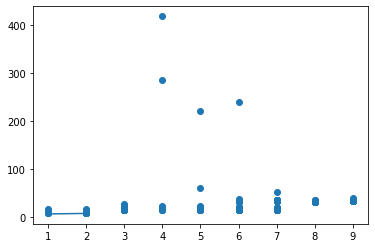

In [ ]:
plt.scatter(h_n, y)
plt.plot([h_n[0][0], h_n[1][0]], [y_pred[0], y_pred[10]])

In [ ]:
h_n[0][0]

1

In [ ]:
h_n[1][0]

2

In [ ]:
y_pred[0]

6.1503744